<a href="https://colab.research.google.com/github/Hussein-Ahmad-94/Tasks/blob/main/share_link_mts_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Define custom loss function for the first model
def custom_loss1(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # Cast y_true to float32
    return K.mean(K.square(y_pred - y_true))

# Define custom loss function for the second model
def custom_loss2(y_true, y_pred):
    # Assuming y_pred has shape (batch_size, 1)
    y_pred = K.reshape(y_pred, (-1,))  # Flatten y_pred
    y_true = K.cast(y_true, 'float32')  # Cast y_true to float32
    return K.mean(K.square(y_pred - y_true))

# Define custom combined loss function for the third model
def custom_combined_loss(y_true, y_pred):
    # Calculate predictions from the first model
    predictions_model1 = model1.predict(train_generator)  # Assuming X_train is your input data
    predictions_model1 = K.reshape(predictions_model1, (-1,))  # Flatten predictions

    # Calculate predictions from the second model
    predictions_model2 = model2.predict(train_generator)  # Assuming X_train is your input data
    predictions_model2 = K.reshape(predictions_model2, (-1,))  # Flatten predictions

    # Calculate the custom combined loss using the outputs of the first and second models
    combined_loss = custom_loss1(y_true, predictions_model1) + custom_loss2(y_true, predictions_model2)

    return combined_loss

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2880)              0         
                                                                 
 dense (Dense)               (None, 64)                184384    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 186,497
Trainable params: 186,497
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)        

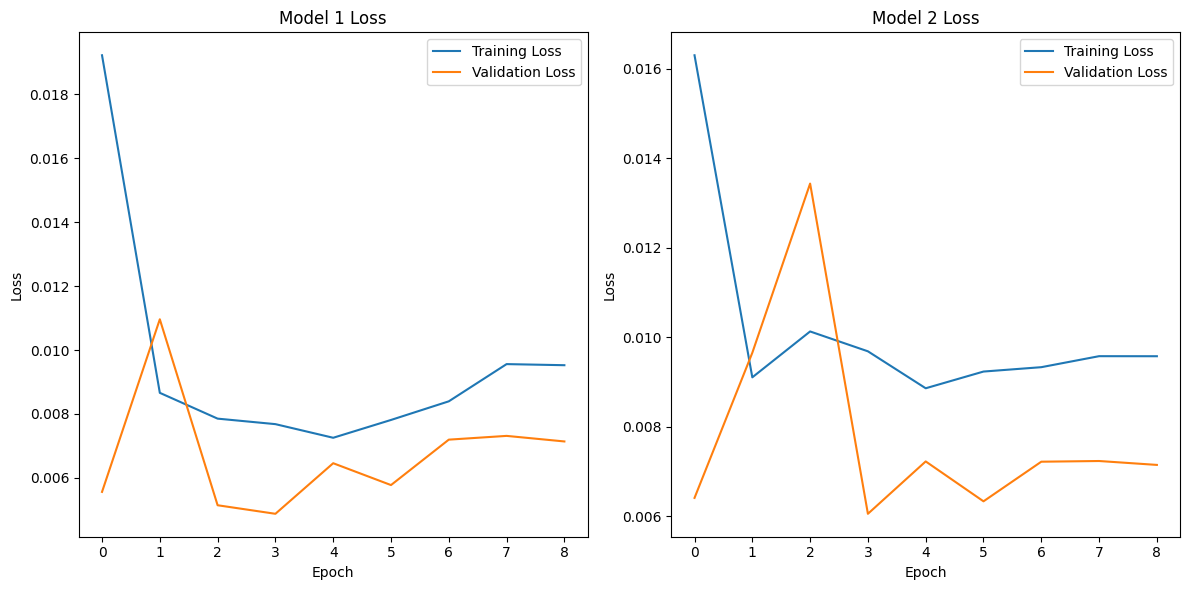

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

# Set up matplotlib parameters
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

# Load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

df_input=df[['Appliances','T_out', 'RH_1', 'Visibility']]
df_input

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

data_scaled
features=data_scaled
target=data_scaled[:,0]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle=False)

# Define time series parameters
win_length = 720
batch_size = 32
num_features = 4

# Create time series generators
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

# Create the first model
model1 = tf.keras.Sequential([
    layers.Flatten(input_shape=(win_length, num_features)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the first model with its custom loss
model1.compile(optimizer='adam', loss=custom_loss1, metrics=['mae'])

# Create the second model
model2 = tf.keras.Sequential([
    layers.Flatten(input_shape=(win_length, num_features)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the second model with its custom loss
model2.compile(optimizer='adam', loss=custom_loss2, metrics=['mae'])

# Create the third model
model3 = tf.keras.Sequential([
    layers.Flatten(input_shape=(win_length, num_features)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])



# Compile the third model with the custom combined loss
model3.compile(optimizer='adam', loss=custom_combined_loss, metrics=['mae'])

# Define early stopping for all three models
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Display model summaries
model1.summary()
model2.summary()
model3.summary()

# Fit all three models with early stopping
history1 = model1.fit(train_generator,
                      epochs=50,
                      batch_size=32,
                      validation_data=test_generator,
                      callbacks=[early_stopping])

history2 = model2.fit(train_generator,
                      epochs=50,
                      batch_size=32,
                      validation_data=test_generator,
                      callbacks=[early_stopping])


# Plot the training and validation loss for model1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model 1 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation loss for model2
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model 2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

# Set up matplotlib parameters
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

# Load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

df_input=df[['Appliances','T_out', 'RH_1', 'Visibility']]
df_input

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

data_scaled
features=data_scaled
target=data_scaled[:,0]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle=False)

# Define time series parameters
win_length = 720
batch_size = 32
num_features = 4

# Create time series generators
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

# Create the first model
model1 = tf.keras.Sequential([
    layers.Flatten(input_shape=(win_length, num_features)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3)
])

# Compile the first model with its custom loss
model1.compile(optimizer='adam', loss=custom_loss1, metrics=['mae'])

# Fit all three models with early stopping
history1 = model1.fit(train_generator,
                      epochs=50,
                      batch_size=32,
                      validation_data=test_generator)

# **Knowledge Distillation**

4/4 [==============================] - 0s 3ms/step


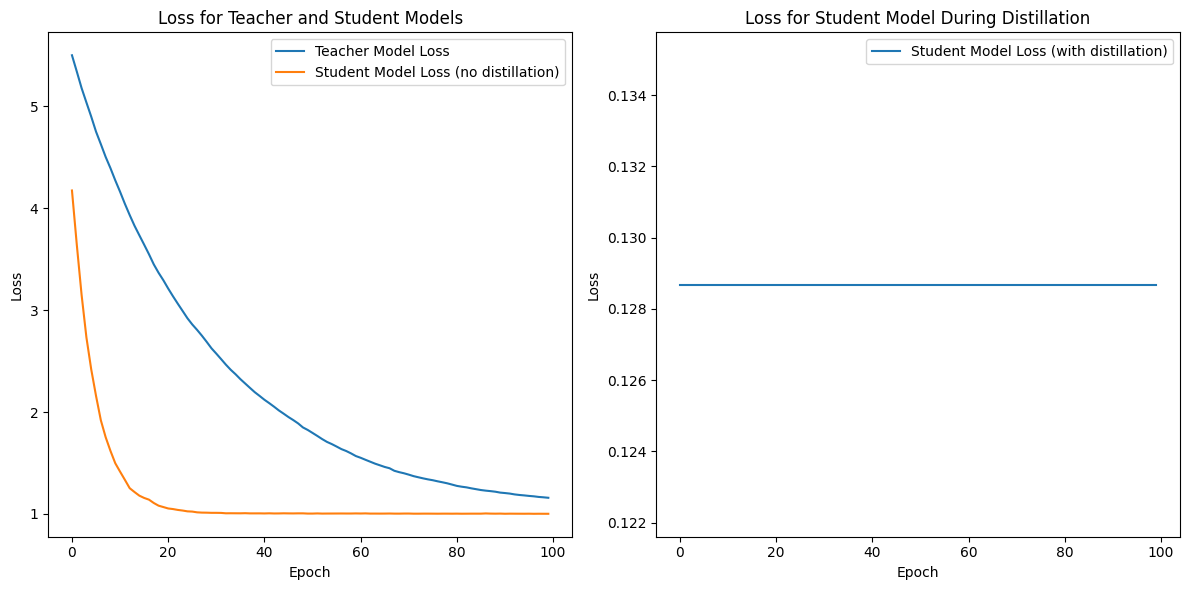

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Generate some example data
X_train = np.random.rand(100, 1)
y_train = 2 * X_train + 1 + np.random.randn(100, 1)

# Create the teacher model
teacher_model = keras.Sequential([
    keras.layers.Dense(6, input_shape=(1,))
])
teacher_model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the teacher model
teacher_history = teacher_model.fit(X_train, y_train, epochs=100, verbose=0)

# Create the student model
student_model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,))
])
student_model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the student model (without distillation) for comparison
student_history_no_distillation = student_model.fit(X_train, y_train, epochs=100, verbose=0)

# Create an additional distillation loss
def distillation_loss(y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true, y_pred)

# Knowledge distillation process
alpha = 0.7  # Weight for distillation loss (adjust as needed)
num_epochs = 100

student_loss_history = []  # To store student loss during distillation

for epoch in range(num_epochs):
    teacher_predictions = teacher_model.predict(X_train)
    student_loss = student_model.evaluate(X_train, teacher_predictions, verbose=0)
    student_loss_history.append(student_loss)

# Plot loss for each model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(teacher_history.history['loss'], label='Teacher Model Loss')
plt.plot(student_history_no_distillation.history['loss'], label='Student Model Loss (no distillation)')
plt.title('Loss for Teacher and Student Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot loss for the student model during distillation
plt.subplot(1, 2, 2)
plt.plot(student_loss_history, label='Student Model Loss (with distillation)')
plt.title('Loss for Student Model During Distillation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
